In [ ]:
#importing libraries required for MLP
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [ ]:
# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features (sepal length, sepal width)
y = iris.target

In [ ]:
# Standardizing features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Define activation functions
def relu(x):
    return np.maximum(0, x)

In [ ]:
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Stability trick
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

In [ ]:
# Forward propagation function
def forward(X, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output):
    # Hidden layer
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = relu(hidden_layer_input)

    # Output layer
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    output_layer_output = softmax(output_layer_input)

    return hidden_layer_output, output_layer_output

In [ ]:
# Function to evaluate the model
def evaluate_model(hidden_dim):
    # Initialize weights and biases
    input_dim = X_train.shape[1]
    output_dim = len(np.unique(y))
    np.random.seed(42)
    weights_input_hidden = np.random.randn(input_dim, hidden_dim)
    bias_hidden = np.random.randn(1, hidden_dim)
    weights_hidden_output = np.random.randn(hidden_dim, output_dim)
    bias_output = np.random.randn(1, output_dim)

    # Perform forward pass
    _, output_layer_output = forward(X_train, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output)

    # Predictions
    predictions = np.argmax(output_layer_output, axis=1)

    # Calculate performance metrics
    accuracy = accuracy_score(y_train, predictions)
    precision = precision_score(y_train, predictions, average='weighted')
    recall = recall_score(y_train, predictions, average='weighted')
    f1 = f1_score(y_train, predictions, average='weighted')

    return accuracy, precision, recall, f1

In [ ]:
# Compare models with different hidden layer sizes
hidden_layer_sizes = [5, 10]  # Try 5 neurons and 10 neurons
performance_metrics = {"accuracy": [], "precision": [], "recall": [], "f1_score": []}

for size in hidden_layer_sizes:
    accuracy, precision, recall, f1 = evaluate_model(size)
    performance_metrics["accuracy"].append(accuracy)
    performance_metrics["precision"].append(precision)
    performance_metrics["recall"].append(recall)
    performance_metrics["f1_score"].append(f1)

# Plot performance metrics
x_labels = [f"{size} neurons" for size in hidden_layer_sizes]
x = np.arange(len(hidden_layer_sizes))  # x positions for the bars

plt.figure(figsize=(10, 6))
bar_width = 0.2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Figure size 1000x600 with 0 Axes>

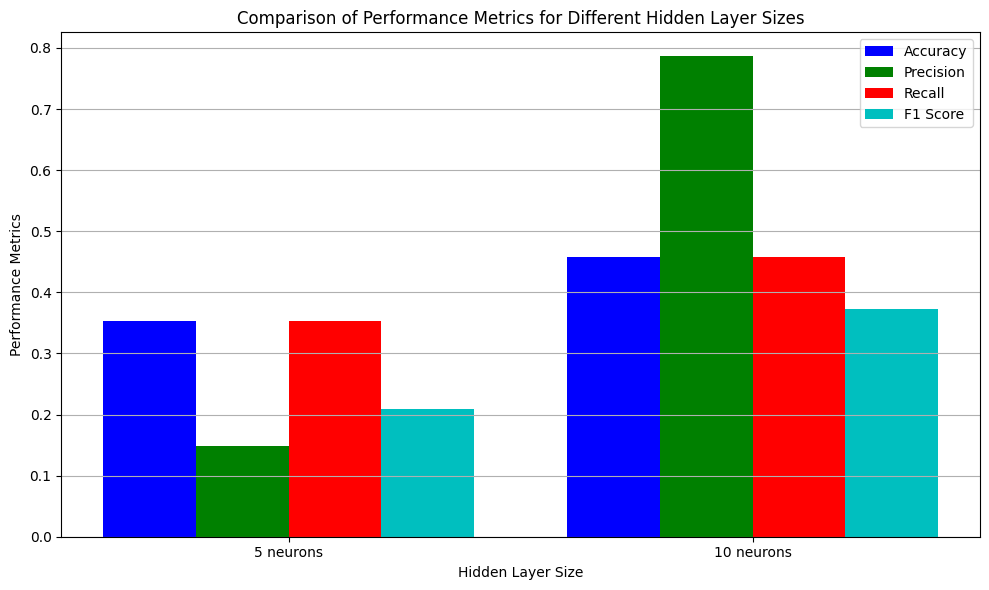

In [ ]:
# Plot performance metrics
x_labels = [f"{size} neurons" for size in hidden_layer_sizes]
x = np.arange(len(hidden_layer_sizes))  # x positions for the bars

plt.figure(figsize=(10, 6))
bar_width = 0.2

# Plot each metric as a separate bar
plt.bar(x - bar_width*1.5, performance_metrics["accuracy"], bar_width, label='Accuracy', color='b')
plt.bar(x - bar_width/2, performance_metrics["precision"], bar_width, label='Precision', color='g')
plt.bar(x + bar_width/2, performance_metrics["recall"], bar_width, label='Recall', color='r')
plt.bar(x + bar_width*1.5, performance_metrics["f1_score"], bar_width, label='F1 Score', color='c')

plt.xticks(x, x_labels)
plt.xlabel("Hidden Layer Size")
plt.ylabel("Performance Metrics")
plt.title("Comparison of Performance Metrics for Different Hidden Layer Sizes")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [ ]:
#Loading the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features (sepal length, sepal width)
y = iris.target

In [ ]:
# Standardizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Activation functions
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Stability trick
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

In [ ]:
# Forward pass
def forward(X, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output):
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = relu(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    output_layer_output = softmax(output_layer_input)
    return hidden_layer_input, hidden_layer_output, output_layer_input, output_layer_output

In [ ]:
# Backpropagation and training
def train_mlp(X, y, hidden_dim, learning_rate, epochs):
    input_dim = X.shape[1]
    output_dim = len(np.unique(y))

    np.random.seed(42)
    weights_input_hidden = np.random.randn(input_dim, hidden_dim)
    bias_hidden = np.random.randn(1, hidden_dim)
    weights_hidden_output = np.random.randn(hidden_dim, output_dim)
    bias_output = np.random.randn(1, output_dim)

    # One-hot encode y
    y_one_hot = np.eye(output_dim)[y]

    for epoch in range(epochs):
        # Forward pass
        hidden_layer_input, hidden_layer_output, output_layer_input, output_layer_output = forward(
            X, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output
        )

        # Loss calculation (categorical cross-entropy)
        loss = -np.mean(np.sum(y_one_hot * np.log(output_layer_output + 1e-9), axis=1))

        # Backward pass
        error_output = output_layer_output - y_one_hot
        grad_weights_hidden_output = np.dot(hidden_layer_output.T, error_output) / X.shape[0]
        grad_bias_output = np.sum(error_output, axis=0, keepdims=True) / X.shape[0]

        error_hidden = np.dot(error_output, weights_hidden_output.T) * relu_derivative(hidden_layer_input)
        grad_weights_input_hidden = np.dot(X.T, error_hidden) / X.shape[0]
        grad_bias_hidden = np.sum(error_hidden, axis=0, keepdims=True) / X.shape[0]

        # Update weights and biases
        weights_input_hidden -= learning_rate * grad_weights_input_hidden
        bias_hidden -= learning_rate * grad_bias_hidden
        weights_hidden_output -= learning_rate * grad_weights_hidden_output
        bias_output -= learning_rate * grad_bias_output

        if epoch % 100 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")

    return weights_input_hidden, bias_hidden, weights_hidden_output, bias_output

In [ ]:
# Decision boundary visualization
def plot_decision_boundary(X, y, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ['red', 'green', 'blue']

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    grid = np.c_[xx.ravel(), yy.ravel()]
    _, _, _, output = forward(grid, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output)
    predictions = np.argmax(output, axis=1)
    predictions = predictions.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, predictions, alpha=0.8, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(cmap_bold), edgecolor='k')
    plt.title("Decision Boundary of MLP")
    plt.xlabel("Sepal Length (standardized)")
    plt.ylabel("Sepal Width (standardized)")
    plt.show()


Training MLP with 5 neurons in the hidden layer
Epoch 1/1000, Loss: 2.1275
Epoch 101/1000, Loss: 0.5003
Epoch 201/1000, Loss: 0.4305
Epoch 301/1000, Loss: 0.4078
Epoch 401/1000, Loss: 0.3976
Epoch 501/1000, Loss: 0.3916
Epoch 601/1000, Loss: 0.3876
Epoch 701/1000, Loss: 0.3846
Epoch 801/1000, Loss: 0.3824
Epoch 901/1000, Loss: 0.3806
Epoch 1000/1000, Loss: 0.3791
Accuracy: 0.8222
Precision: 0.8338
Recall: 0.8222
F1 Score: 0.8179


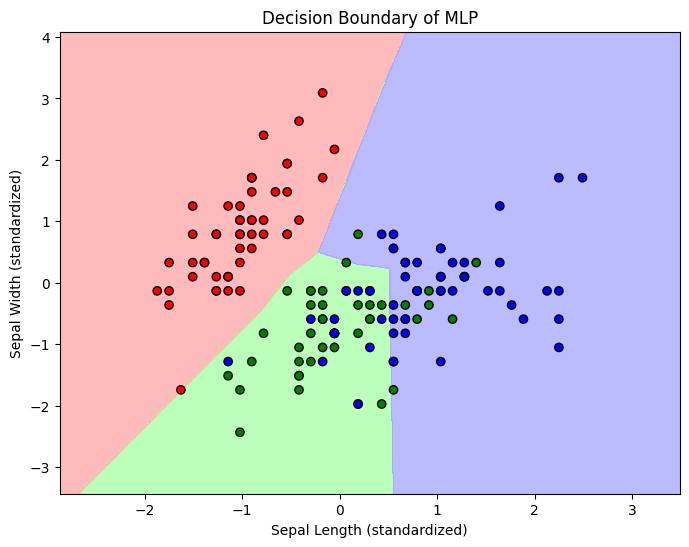


Training MLP with 10 neurons in the hidden layer
Epoch 1/1000, Loss: 1.5172
Epoch 101/1000, Loss: 0.4328
Epoch 201/1000, Loss: 0.3969
Epoch 301/1000, Loss: 0.3787
Epoch 401/1000, Loss: 0.3693
Epoch 501/1000, Loss: 0.3627
Epoch 601/1000, Loss: 0.3573
Epoch 701/1000, Loss: 0.3532
Epoch 801/1000, Loss: 0.3502
Epoch 901/1000, Loss: 0.3475
Epoch 1000/1000, Loss: 0.3452
Accuracy: 0.8222
Precision: 0.8338
Recall: 0.8222
F1 Score: 0.8179


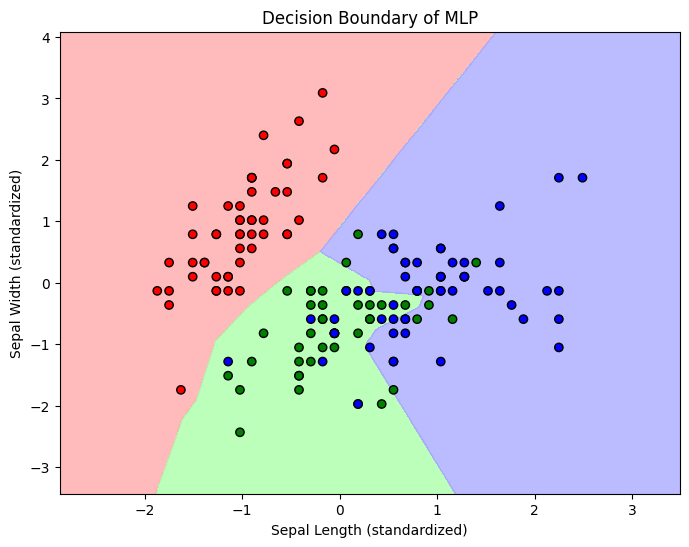

In [ ]:
# Hyperparameter tuning
hidden_layer_sizes = [5, 10]  # Different numbers of neurons in the hidden layer
learning_rate = 0.1
epochs = 1000

for size in hidden_layer_sizes:
    print(f"\nTraining MLP with {size} neurons in the hidden layer")
    weights_input_hidden, bias_hidden, weights_hidden_output, bias_output = train_mlp(X_train, y_train, size, learning_rate, epochs)

    # Evaluate performance on test set
    _, _, _, output_layer_output = forward(X_test, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output)
    predictions = np.argmax(output_layer_output, axis=1)

    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Visualize decision boundary
    plot_decision_boundary(X, y, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output)